https://colab.research.google.com/drive/10nKpmrW0mw0gWhFPVl1DCb3N5AEruJes?usp=sharing


In [260]:
import pandas as pd
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [261]:
iris_df = datasets.load_iris()

In [262]:
X = iris_df.data
y = iris_df.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y)

In [432]:
model = Sequential()
model.add(Dense(8, input_dim=4, activation='softplus'))
model.add(Dense(12, activation='softplus'))
model.add(Dense(6, activation='softplus'))
model.add(Dense(3, activation='softplus'))
model.add(Dense(1, activation='softplus'))

In [433]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [434]:
model.compile(loss='poisson', optimizer='rmsprop', metrics=['accuracy'])
#adam
#rmsprop

In [435]:
model.fit(X_train, y_train, epochs=1000, batch_size=10)

Epoch 1/1000
12/12 [==============================] - 1s 1ms/step - loss: 1.5073 - accuracy: 0.3572
Epoch 2/1000
12/12 [==============================] - 0s 1ms/step - loss: 1.2659 - accuracy: 0.3757
Epoch 3/1000
12/12 [==============================] - 0s 1ms/step - loss: 1.1376 - accuracy: 0.3759
Epoch 4/1000
12/12 [==============================] - 0s 1ms/step - loss: 1.0943 - accuracy: 0.3367
Epoch 5/1000
12/12 [==============================] - 0s 1ms/step - loss: 1.0042 - accuracy: 0.3305
Epoch 6/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.9858 - accuracy: 0.3496
Epoch 7/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.9591 - accuracy: 0.3560
Epoch 8/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.9463 - accuracy: 0.3248
Epoch 9/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.9360 - accuracy: 0.3412
Epoch 10/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.9249 - accuracy: 0.3633

In [436]:
y_pred = model.predict(X_test)
for each in y_pred:
  each[0] = round(each[0])

In [437]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [438]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 177ms/step - loss: 0.5407 - accuracy: 0.6667
Accuracy: 66.67


Модель была построена из 6 слоев с функцией активации softplus, функцией потерь poisson и оптимизирующей функцией rmsprop, что привело к результату точности в 66.67, что на тестовой выборке показало хороший результат без ошибок за 30 попыток.

In [522]:
model = Sequential()
model.add(Dense(8, input_dim=4, activation='softplus'))
model.add(Dense(12, activation='softplus'))
model.add(Dense(6, activation='softplus'))
model.add(Dense(3, activation='softplus'))
model.add(Dense(1, activation='softplus'))

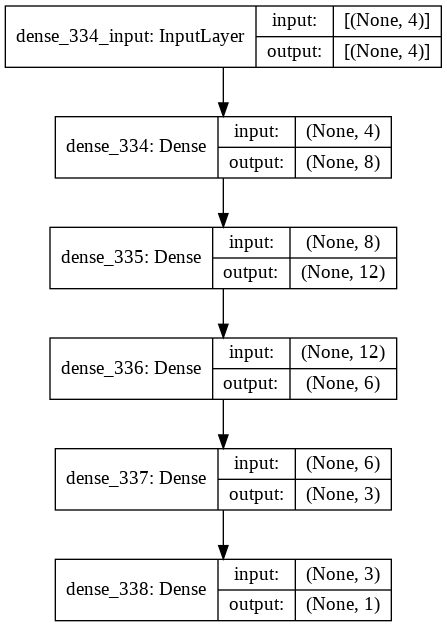

In [523]:
model.compile(loss='poisson', optimizer='sgd', metrics=['accuracy'])
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [524]:
model.fit(X_train, y_train, epochs=500, batch_size=10)

Epoch 1/500
12/12 [==============================] - 0s 1ms/step - loss: 1.0325 - accuracy: 0.3051
Epoch 2/500
12/12 [==============================] - 0s 1ms/step - loss: 1.0079 - accuracy: 0.3558
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 0.9745 - accuracy: 0.3090
Epoch 4/500
12/12 [==============================] - 0s 1ms/step - loss: 0.9790 - accuracy: 0.2882
Epoch 5/500
12/12 [==============================] - 0s 1ms/step - loss: 0.9751 - accuracy: 0.3209
Epoch 6/500
12/12 [==============================] - 0s 1ms/step - loss: 0.9686 - accuracy: 0.3331
Epoch 7/500
12/12 [==============================] - 0s 1ms/step - loss: 0.9615 - accuracy: 0.3011
Epoch 8/500
12/12 [==============================] - 0s 1ms/step - loss: 0.9686 - accuracy: 0.4003
Epoch 9/500
12/12 [==============================] - 0s 1ms/step - loss: 0.9555 - accuracy: 0.3908
Epoch 10/500
12/12 [==============================] - 0s 1ms/step - loss: 0.9498 - accuracy: 0.2832
Epoch 11/

In [528]:
y_pred = model.predict(X_test)
for each in y_pred:
   each[0] = round(each[0])

In [529]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [530]:
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

5/5 [==============================] - 0s 2ms/step - loss: 0.5606 - accuracy: 0.6667
Accuracy: 66.67


Дальнейшие подборки комбинаций функций активации, потерь и оптимизации приводили к ухудшению результатов, при замененной функции оптимизации на sgd результат точности модели остался такой же.